# Demonstrating the Theil Index of Inequality:
## Spatial Inequality in Mexico: 1940-2000

1. Imports & Input Data
2. Classic Theil Index
3. Theil Regional Inequality Decomposition

-------------------------

### Imports & Input Data

In [41]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-09-12T10:33:11.784894-07:00

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 6.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit



In [42]:
import geopandas
import inequality
import libpysal
import matplotlib.pyplot as plt
import numpy

In [43]:
%watermark -w
%watermark -iv

Watermark: 2.4.3

matplotlib: 3.9.1
inequality: 0.1.dev212+g0df9cfc.d20240912
geopandas : 1.0.1
numpy     : 2.0.1
libpysal  : 4.12.0



In [44]:
libpysal.examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [45]:
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

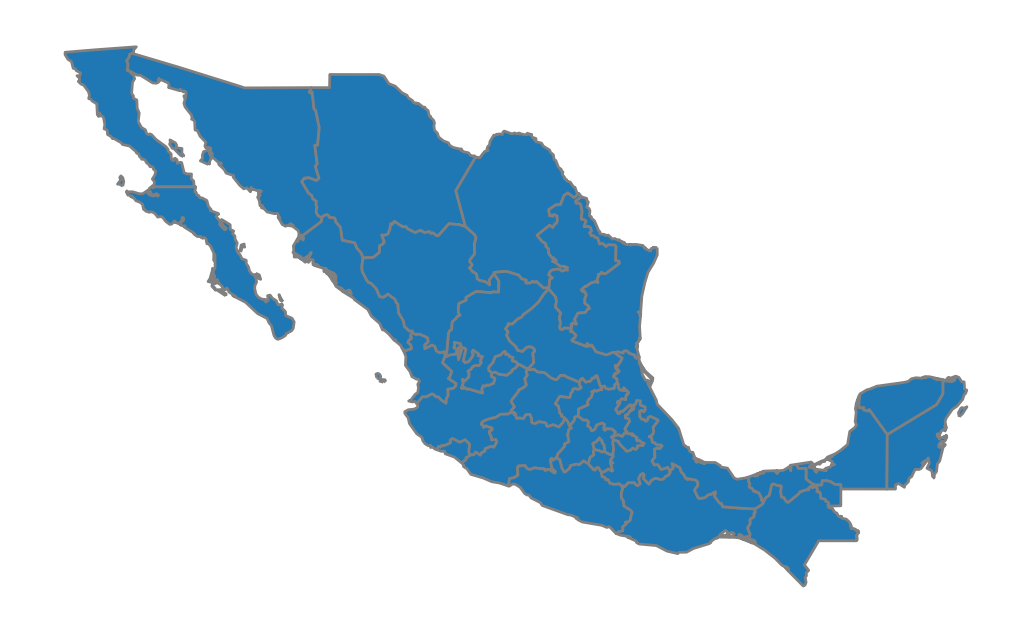

In [76]:
ax = gdf.plot(edgecolor="grey")
ax.set_axis_off()

In [77]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.5249 21.85664, -101.5883 21.772..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.8462 22.01176, -101.9653 21.883..."


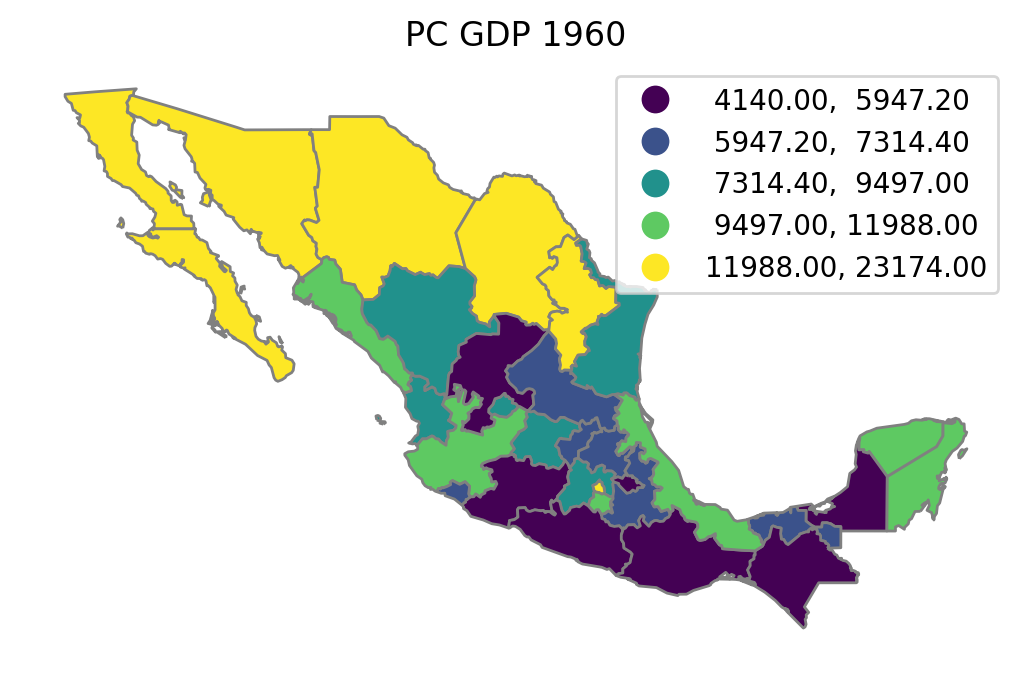

In [78]:
ax = gdf.plot(
    column="PCGDP1960", k=5, scheme="Quantiles", edgecolor="grey", legend=True
)
ax.set_axis_off()
ax.set_title("PC GDP 1960");
# plt.savefig("1940.png")

------------------------------------------------

### Classic Theil Coefficient

In [79]:
theil_1940 = inequality.theil.Theil(gdf["PCGDP1960"])
theil_1940.T

0.1047294148824586

--------------------------------------

### Theil Regional Inequality Decomposition

In [80]:
inequality.theil.TheilD

inequality.theil.TheilD

In [81]:
regimes = gdf["HANSON98"]

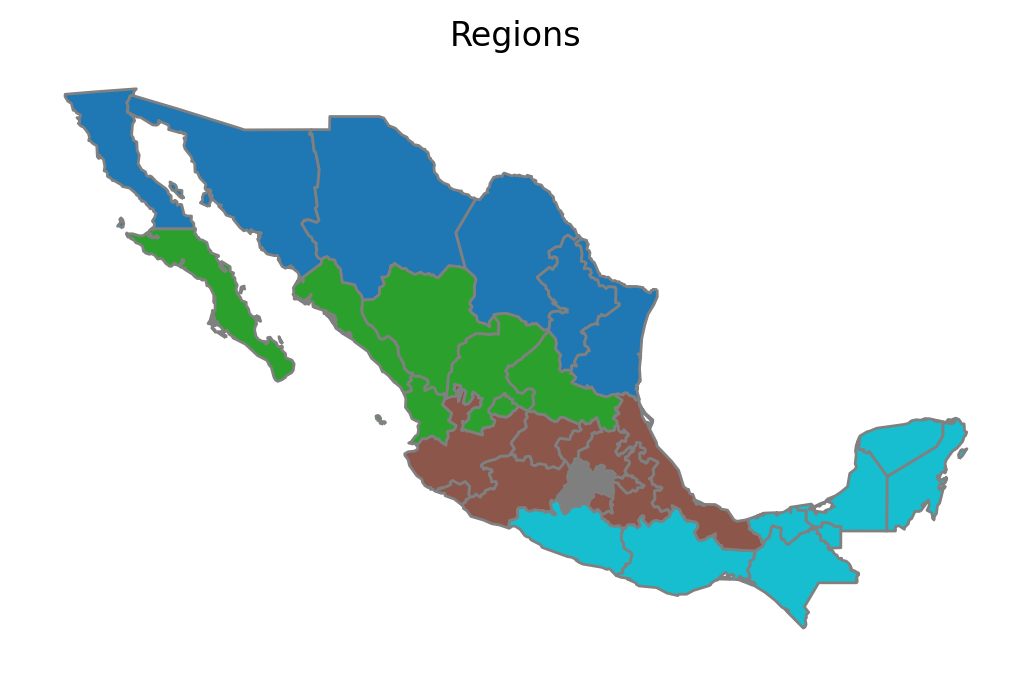

In [82]:
ax = gdf.plot(column="HANSON98", categorical=True, edgecolor="grey")
ax.set_title("Regions")
ax.set_axis_off()
# plt.savefig("regions.png")

In [83]:
numpy.random.seed(12345)
ts = inequality.theil.TheilD(gdf["PCGDP1960"], regimes)

In [84]:
ts.T

0.1047294148824586

In [85]:
ts.bg

array([0.05260921])

In [86]:
ts.wg

array([0.0521202])

A measure of *spatial polarization* is obtained as the ratio of the `bg` component to overall inequality `T`:


In [92]:
ts.bg[0] / ts.T

array([0.50233466])

In other words, inequality between the regions accounts for just over 50 percent of overall inequality between the states in Mexico in 1969.

This leads to a question of how to interpret this polarization measure. One way to answer this, is to compare this value against that obtained from a random distribution. That is, does the assignment of states to the regions actually matter?

### Inference on inequality decomposition

We address the inference question by randomly assigning states to the regions. This is done though a random permutation of the 32 states. We repeat this random permutation a large number of times, and for each random permutation we calculate the decomposition. Since the random permutations are the counterfactuals where state incomes were random in space, this gives us a distribution of the between group (region) component under the null.



In [94]:
import numpy as np

np.random.seed(10)

In [95]:
ts = inequality.theil.TheilDSim(gdf["PCGDP1960"], regimes, permutations=999)

In [96]:
ts.bg_pvalue

array([0.001])

The p-value is a pseudo p-value obtained as the share of all realizations (including the observed realization) that generated `bg` values as large as the one observed. Since we asked for 999 permutations, our p-value indicates that none of the counterfactual realizations generated values as large as what we observed. 

In [58]:
import seaborn as sbn

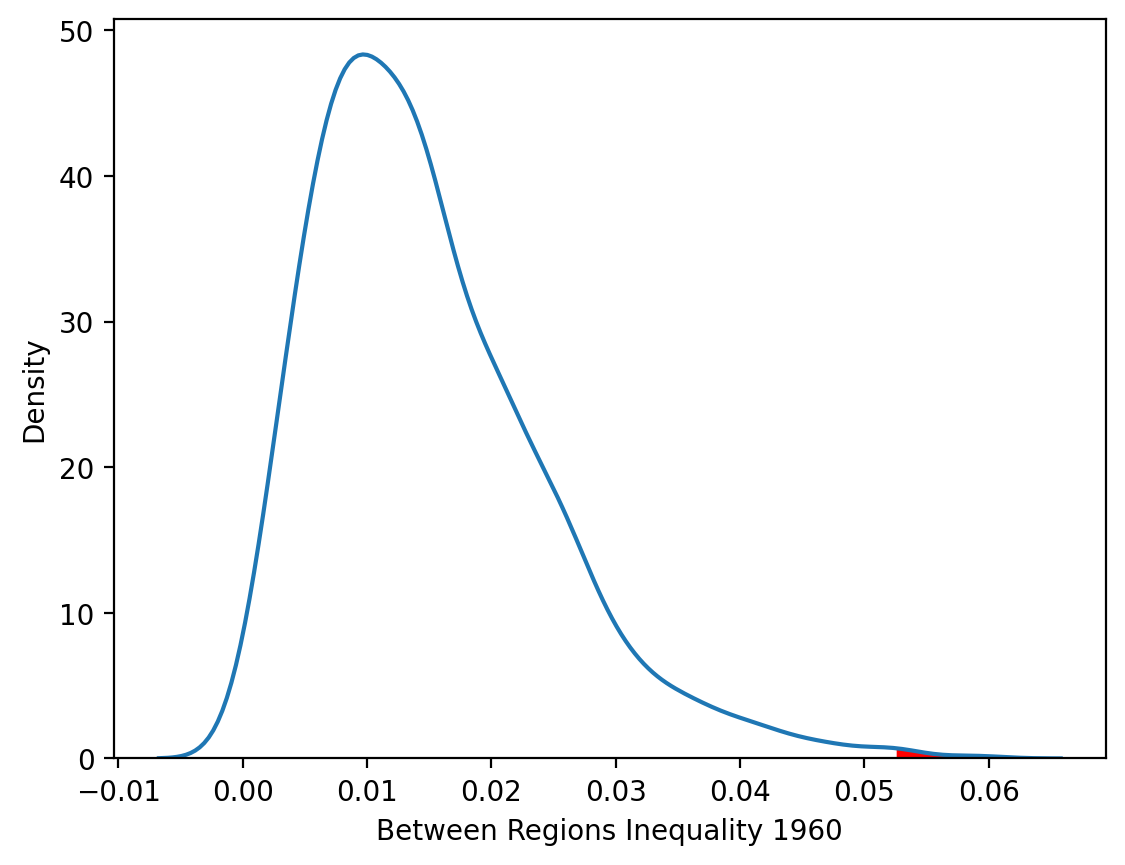

In [74]:
import matplotlib.pyplot as plt

kdeplot = sbn.kdeplot(ts.bg, fill=False, legend=False)
x_vals = kdeplot.lines[0].get_xdata()
y_vals = kdeplot.lines[0].get_ydata()
plt.fill_between(x_vals, y_vals, where=(x_vals > ts.bg[0]), color="red")
plt.xlabel("Between Regions Inequality 1960");

-----------------------

## Dynamics of Regional Inequality

In [52]:
decades = range(1940, 2010, 10)
decades

ts = [inequality.theil.Theil(gdf["PCGDP%s" % decade]).T for decade in decades]
ts

[0.20894344230358594,
 0.1522245052653123,
 0.1047294148824586,
 0.10194724969688372,
 0.09560112758525613,
 0.10511256397981851,
 0.10660832349588023]